<a href="https://colab.research.google.com/github/josh-english/DataVisualization/blob/master/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 - Data Preprocessing

## Description

Preprocess 20 Newsgroup dataset as corpus and visualize its statistical information. (10’)

two vocabulaires

lda visualization
pyLDAvis
word cloud
t-SNE

PCA for doc2vec

## Get the Data

## Data in Dict and Corpus format (Dataset Stats.)


In [0]:
!pip install jinja

  Using cached https://files.pythonhosted.org/packages/df/50/70f41c599cf0ace6c554b07108916513c70d0e950b0abb18c27a865df7a2/Jinja-1.2.tar.gz
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-zmdrz4bd/jinja/


In [0]:
from gensim import corpora
import gensim.downloader as api
from nltk.corpus import stopwords
import re
import os

import nltk
nltk.download('stopwords')

# path to saved dict and corpus
PATH = './'

import  csv

topics = []

def return_2k_words(s, top2k):
    words = []
    for word in s:
        if top2k.get(word):
            words.append(word)
    return words

def load_preprocessed_data(filename):
  f = open(filename)
  preprocessed_data = list(rec for rec in csv.reader(f, delimiter=','))
  return preprocessed_data

def save_preprocessed_data(list_of_lists, filename):
    with open(filename,"w") as f:
      wr = csv.writer(f)
      wr.writerows(list_of_lists)

if(True or not(os.path.isfile(PATH + 'dct.dict')) or not(os.path.isfile(PATH + 'corpus.mm')) or not(os.path.isfile(PATH + 'corpus.mm'))):
    # data preprocessing helper methods
    def strip_non_ascii(string):
        ''' Returns the string without non ASCII characters'''
        stripped = (c for c in string if 0 < ord(c) < 127)
        return ''.join(stripped)


    def clean_text(s):
        """ Remove non alphabetic characters. E.g. 'B:a,n+a1n$a' becomes 'Banana' """
        s = s.replace("\n", " ")
        s = re.sub("[^a-z A-Z]", "", s)
        s = s.replace('  ', ' ')
        return s.casefold()

    # get data from gensim
    dataset = api.load("20-newsgroups")
    dataset = [wd for wd in dataset]

    # prepare data
    stop_words = stopwords.words('english')
    stop_words = stop_words + ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could', 'ax', 'max', 'giz']

    data_preprocessed = []

    for i, doc in enumerate(dataset):
        doc_out = []
        data = doc['data']
        topics.append(doc['topic'])
        sent_list = re.findall(r"(\.|\?|\!)", data)
        cleaned = clean_text(strip_non_ascii(data)).split()
        for wd in cleaned:
            if wd not in stop_words:
                doc_out.append(wd)
            else:
                continue
        data_preprocessed.append(doc_out)
    
    save_preprocessed_data(data_preprocessed, PATH + "preprocessedData.csv")

    # make dictionary and corpus
    dct = corpora.Dictionary(data_preprocessed)
    corpus = [dct.doc2bow(line) for line in data_preprocessed]
    # save the dict and corpus
    dct.save('dct.dict')
    corpora.MmCorpus.serialize('corpus.mm', corpus)
else:
    # Load the dict back
    dct = corpora.Dictionary.load(PATH + 'dct.dict')
    corpus = corpora.MmCorpus(PATH + 'corpus.mm')

total_count = 0
# get word count
counts = {}
for line in corpus:
    for id, count in line:
        total_count += 1
        word = dct[id]
        if word in counts:
            counts[word] += count
        else:
            counts[word] = count

from collections import Counter
top2k = Counter(counts).most_common(2000)
top2k_dict = dict(top2k)

preprocessed_data = load_preprocessed_data(PATH + 'preprocessedData.csv')

preprocessed_data_2k = list(map((lambda x: return_2k_words(x, top2k_dict)), preprocessed_data))
save_preprocessed_data(preprocessed_data_2k, PATH + "preprocessedData_2k.csv")

int_topics = []
topic_indexes = []

for topic in topics:
  if topic not in topic_indexes:
    topic_indexes.append(topic)
  int_topics.append(topic_indexes.index(topic))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


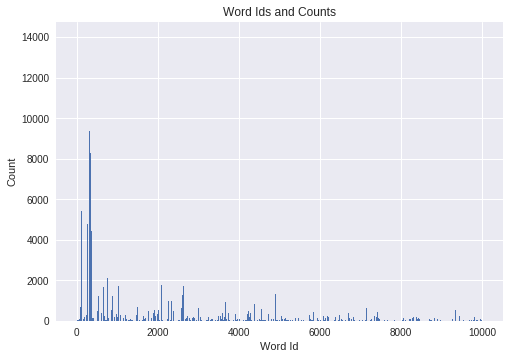

In [0]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(10000)
y = list(counts.values())[:10000]
plt.bar(x, y)
plt.xlabel('Word Id')
plt.ylabel('Count')
plt.title("Word Ids and Counts")
plt.show()

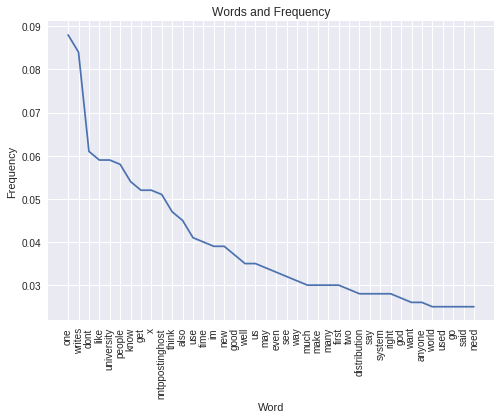

In [0]:
top40 = top2k[:40]
x = list((item[0]) for item in top40)
y = list(round(item[1]/len(counts), 3) for item in top40)
plt.plot(x,y)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title("Words and Frequency")
plt.show()

# Step 2 - Vocabularies from BoW and TF-IDF

## Description

Build two different vocabularies upon different preprocessing ways; Learn Bag-of-words (BoW) and TF-IDF model with each vocabulary accordingly. (10’)

## Bag of Words

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors:

in pca
in kmeans
plotting!


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


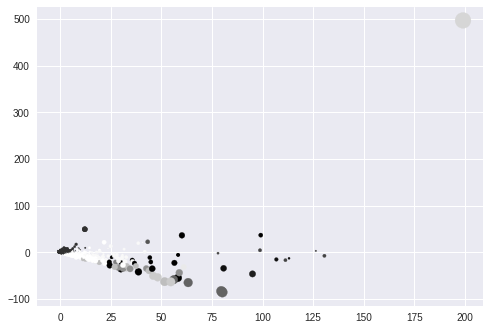

in pca
in kmeans
plotting!


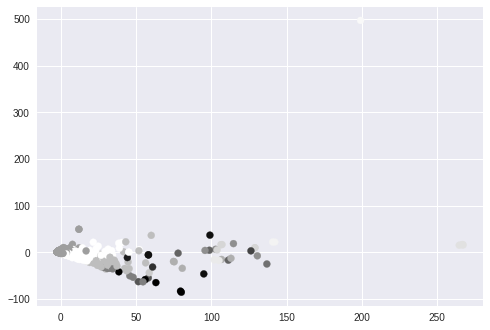

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.042745727060061314

In [0]:
# from: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.datasets import fetch_20newsgroups
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words = stop_words + ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could']
stop_words = stop_words + ['ax', 'max', 'giz']

#BoW
# tokenizing text with scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stop_words, token_pattern=r'[a-z]{3,}', max_features=2000)
X_bow = count_vect.fit_transform(twenty_train.data).todense()
#print(X_train_counts.shape)

#reduce dimensionality of BoW for kmeans graph
print("in pca")
pca = PCA(n_components=3).fit(X_bow)
data2D = pca.transform(X_bow)
#BoW Kmeans
print("in kmeans")
true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(X_bow)
#plot kmeans reduced to 2d
print("plotting!")
plt.scatter(data2D[:,0], data2D[:,1], data2D[:,2], c=model.labels_)
plt.show()

#reduce dimensionality of BoW for kmeans graph
print("in pca")
pca = PCA(n_components=2).fit(X_bow)
data2D = pca.transform(X_bow)
#BoW Kmeans
print("in kmeans")
true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(X_bow)
#plot kmeans reduced to 2d
print("plotting!")
plt.scatter(data2D[:,0], data2D[:,1], c=model.labels_)
plt.show()

from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(twenty_train.target, model.labels_)

## TF-IDF

In [0]:
import nltk
nltk.download('stopwords')

# from: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = stop_words + ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could']
stop_words = stop_words + ['ax', 'max', 'giz']

#BoW
# tokenizing text with scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stop_words, token_pattern=r'[a-z]{3,}', max_features=2000)
X_bow = count_vect.fit_transform(twenty_train.data).todense()
#print(X_train_counts.shape)

#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tf = tfidf_transformer.fit_transform(X_bow).todense()
#print(X_train_tfidf.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


in pca
in kmeans
plotting!


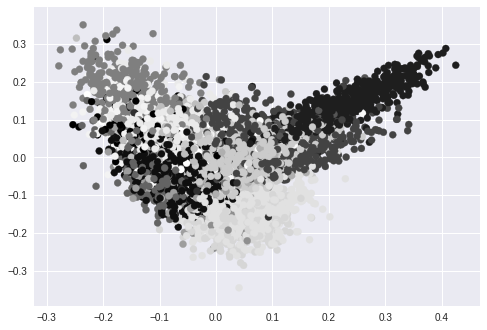

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.3699024379296041

In [0]:
#reduce dimensionality of BoW for kmeans graph
print("in pca")
pca = PCA(n_components=2).fit(X_tf)
data2D = pca.transform(X_tf)
#BoW Kmeans
print("in kmeans")
true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X_tf)
#plot kmeans reduced to 2d
print("plotting!")
plt.scatter(data2D[:,0], data2D[:,1], c=model.labels_)
plt.show()

from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(twenty_train.target, model.labels_)

in pca
in kmeans
plotting!


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


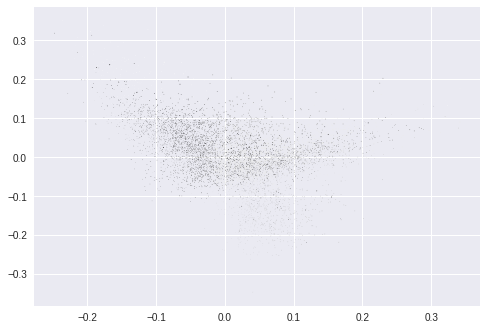

In [0]:
#reduce dimensionality of BoW for kmeans graph
print("in pca")
pca = PCA(n_components=3).fit(X_tf)
data2D = pca.transform(X_tf)
#BoW Kmeans
print("in kmeans")
true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(X_tf)
#plot kmeans reduced to 2d
print("plotting!")
plt.scatter(data2D[:,0], data2D[:,1], data2D[:,2], c=model.labels_)
plt.show()

# Step 3 - 2 LDA Models

## Description

Train two LDA models upon the vocabularies in Step 2; Visualize topics with four different methods; and eventually get the topic distribution (as feature) for each document. (20’)

In [0]:
from sklearn.datasets import fetch_20newsgroups

remove = ('headers', 'footers', 'quotes')
newsgroupsTrain = fetch_20newsgroups(subset='all', remove=remove)
news = [' '.join(filter(str.isalpha, raw.lower().split())) for raw in newsgroupsTrain.data]

print(news[1])
type(newsgroupsTrain)

my brother is in the market for a video card that supports vesa local bus with does anyone have diamond stealth pro local bus orchid farenheit ati graphics ultra pro any other vlb card please post or thank matt


sklearn.utils.Bunch

In [0]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfVectorizer = CountVectorizer(max_df=0.5,  
                                min_df=10,     
                                max_features=18000, # 2000, or 18000 
                                stop_words='english')

tfMatrix = tfVectorizer.fit_transform(news)
features = tfVectorizer.get_feature_names()

nTopics = 20

lda = LatentDirichletAllocation(n_topics=nTopics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

start_time = time.time()
topics = lda.fit(tfMatrix)
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


--- 56.396586418151855 seconds ---


In [0]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tfMatrix, tfVectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      11.373729        1       1  0.168205 -0.048450
3       8.555459        1       2 -0.043538  0.228433
9       7.338666        1       3 -0.040337 -0.121631
16      7.246127        1       4  0.215994 -0.003196
0       6.263683        1       5 -0.073830  0.234414
8       6.106078        1       6  0.184612  0.043090
14      5.951002        1       7  0.213235 -0.043520
5       5.464924        1       8  0.074458 -0.167650
11      5.294477        1       9 -0.242025  0.047967
10      4.920713        1      10  0.066958  0.109880
17      3.948667        1      11  0.165414  0.041146
15      3.895220        1      12 -0.137674  0.260497
18      3.849497        1      13  0.014315 -0.008045
7       3.468037        1      14 -0.023066 -0.178989
6       3.281642        1      15 -0.122402 -0.198541
1       3.278075        1      16 -0.013980  0.160853
4       3.126022        1      17  0.121623 -0.004389
12      2.482242        1      18 -0.117683 -0.181452
19      2.411411        1      19 -0.236889 -0.029419
13      1.744330        1      20 -0.173390 -0.140997, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
931   Default  5950.000000         just  5950.000000  30.0000  30.0000
949   Default  4759.000000         know  4759.000000  29.0000  29.0000
1811  Default  4564.000000        think  4564.000000  28.0000  28.0000
762   Default  3267.000000         good  3267.000000  27.0000  27.0000
1679  Default  1306.000000        space  1306.000000  26.0000  26.0000
679   Default  1732.000000         file  1732.000000  25.0000  25.0000
1191  Default  1826.000000       number  1826.000000  24.0000  24.0000
998   Default  5917.000000         like  5917.000000  23.0000  23.0000
757   Default  1886.000000          god  1886.000000  22.0000  22.0000
1963  Default  1437.000000      windows  1437.000000  21.0000  21.0000
855   Default  1248.000000        image  1248.000000  20.0000  20.0000
1884  Default  4598.000000          use  4598.000000  19.0000  19.0000
432   Default  1628.000000         data  1628.000000  18.0000  18.0000
760   Default  2152.000000        going  2152.000000  17.0000  17.0000
1994  Default  1076.000000         year  1076.000000  16.0000  16.0000
937   Default  1030.000000          key  1030.000000  15.0000  15.0000
1279  Default  5359.000000       people  5359.000000  14.0000  14.0000
1170  Default  3739.000000          new  3739.000000  13.0000  13.0000
733   Default   935.000000         game   935.000000  12.0000  12.0000
101   Default   857.000000     armenian   857.000000  11.0000  11.0000
879   Default  1759.000000  information  1759.000000  10.0000  10.0000
169   Default  2052.000000      believe  2052.000000   9.0000   9.0000
540   Default  1218.000000        drive  1218.000000   8.0000   8.0000
766   Default  1545.000000   government  1545.000000   7.0000   7.0000
1419  Default  1231.000000     question  1231.000000   6.0000   6.0000
1529  Default  2015.000000        right  2015.000000   5.0000   5.0000
1658  Default  1253.000000     software  1253.000000   4.0000   4.0000
1389  Default  1521.000000      program  1521.000000   3.0000   3.0000
1786  Default   824.000000         team   824.000000   2.0000   2.0000
1449  Default  2131.000000       really  2131.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
1192  Topic20   308.274232      numbers   421.285693   3.7365  -3.6671
1739  Topic20   151.473888      studies   207.434607   3.7344  -4.3777
1834  Topic20   296.589009        total   412.672313   3.7185  -3.7058
1245  Topic20   101.176012      overall   143.298024   3.7007  -4.7812
535   Topic20   156.798340       double   222.104811   3.7006  -4.3432
646   Topic20   116.286847       failed   166.767409   3.6883  -4.6421


In [0]:
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

#for full corpus
#dct = corpora.Dictionary.load('./dct.dict')
#corpus = corpora.MmCorpus('./corpus.mm')


PATH = './'

def load_preprocessed_data():
  f = open(PATH + 'preprocessedData_2k.csv')
  preprocessed_data = list(rec for rec in csv.reader(f, delimiter=','))
  print(preprocessed_data[:1])
  return preprocessed_data
        
preprocessed_data = load_preprocessed_data()

dct = corpora.Dictionary(preprocessed_data)
corpus = [dct.doc2bow(line) for line in preprocessed_data]

# Train the LDA model
start_time = time.time()
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=100,
                         num_topics=20,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

print("--- %s seconds ---" % (time.time() - start_time))

lda_model.save('lda_model.model')
lda_model.print_topics(-1)


[['andrew', 'genocide', 'work', 'god', 'civil', 'engineering', 'carnegie', 'mellon', 'pittsburgh', 'pa', 'writes', 'may', 'believe', 'correct', 'believe', 'believe', 'choose', 'whether', 'accept', 'gods', 'us', 'difference', 'cant', 'really', 'course', 'believe', 'biblical', 'doctrine', 'shows', 'among', 'church', 'always', 'beginning', 'say', 'believe', 'mean', 'believe', 'free', 'men', 'choose', 'course', 'life', 'also', 'god', 'however', 'hold', 'otherwise', 'end', 'god', 'god', 'must', 'give', 'enough', 'saved', 'receive', 'final', 'heaven', 'mean', 'without', 'cant', 'saved', 'means', 'god', 'give', 'knowing', 'need', 'hell', 'people', 'saved', 'saved', 'god', 'effort', 'god', 'become', 'fire', 'heart', 'thus', 'gods', 'punishment', 'working', 'holy', 'spirit', 'yes', 'god', 'judge', 'punishment', 'last', 'well', 'hold', 'god', 'certainly', 'gives', 'everybody', 'good', 'done', 'even', 'little', 'cant', 'next', 'life', 'one', 'next', 'life', 'one', 'every', 'sin', 'punishment', 't

[(0,
  '0.062*"writes" + 0.038*"nntppostinghost" + 0.034*"university" + 0.018*"distribution" + 0.018*"computer" + 0.013*"apr" + 0.012*"replyto" + 0.011*"science" + 0.009*"technology" + 0.009*"institute"'),
 (1,
  '0.016*"dont" + 0.014*"one" + 0.014*"like" + 0.013*"get" + 0.013*"know" + 0.012*"think" + 0.011*"im" + 0.011*"time" + 0.009*"writes" + 0.009*"well"'),
 (2,
  '0.014*"book" + 0.014*"one" + 0.012*"church" + 0.011*"men" + 0.010*"sex" + 0.010*"also" + 0.009*"new" + 0.009*"paul" + 0.008*"law" + 0.008*"homosexual"'),
 (3,
  '0.021*"israel" + 0.017*"war" + 0.014*"jews" + 0.012*"people" + 0.012*"writes" + 0.011*"israeli" + 0.011*"us" + 0.011*"jewish" + 0.010*"peace" + 0.010*"rights"'),
 (4,
  '0.060*"x" + 0.022*"file" + 0.012*"files" + 0.012*"image" + 0.012*"program" + 0.011*"use" + 0.010*"window" + 0.010*"available" + 0.009*"ftp" + 0.008*"software"'),
 (5,
  '0.025*"armenian" + 0.022*"armenians" + 0.021*"turkish" + 0.014*"armenia" + 0.013*"people" + 0.012*"russian" + 0.012*"turkey" +

In [0]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dct)
pyLDAvis.display(LDAvis_prepared)

In [0]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms
  
num_topics = 20
model = lda_model
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(model,topic_number=i, topn=10, output=True )
    topic_summaries += [tmp[:5]]
    print

term                 frequency

Topic 0 |---------------------

writes               0.062
nntppostinghost      0.038
university           0.034
distribution         0.018
computer             0.018
apr                  0.013
replyto              0.012
science              0.011
technology           0.009
institute            0.009
Topic 1 |---------------------

dont                 0.016
one                  0.014
like                 0.014
get                  0.013
know                 0.013
think                0.012
im                   0.011
time                 0.011
writes               0.009
well                 0.009
Topic 2 |---------------------

book                 0.014
one                  0.014
church               0.012
men                  0.011
sex                  0.010
also                 0.010
new                  0.009
paul                 0.009
law                  0.008
homosexual           0.008
Topic 3 |---------------------

israel               0.021
war

Topic 0 --------------------------------------



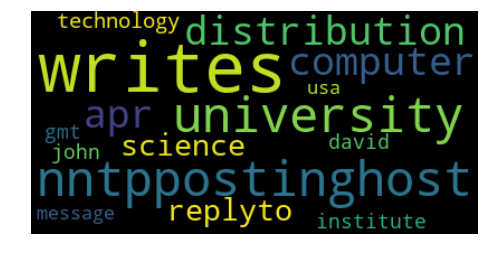

Topic 1 --------------------------------------



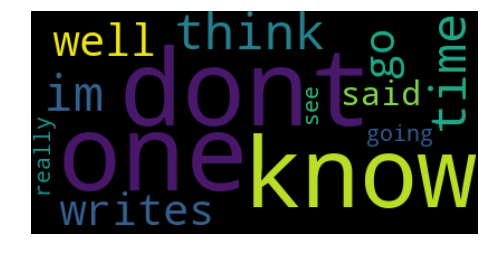

Topic 2 --------------------------------------



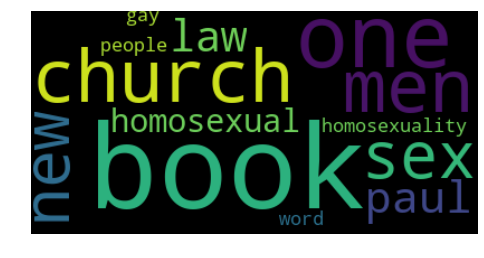

Topic 3 --------------------------------------



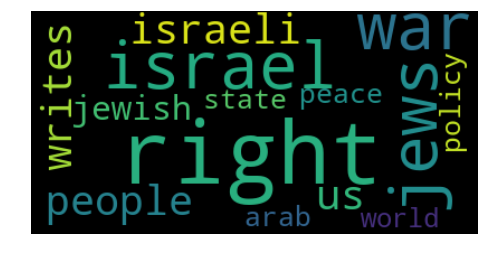

Topic 4 --------------------------------------



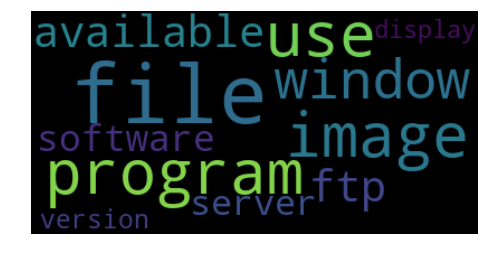

Topic 5 --------------------------------------



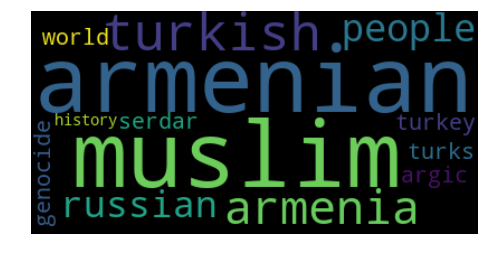

Topic 6 --------------------------------------



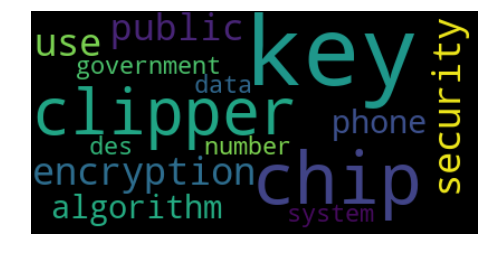

Topic 7 --------------------------------------



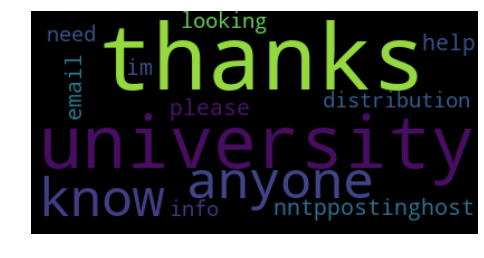

Topic 8 --------------------------------------



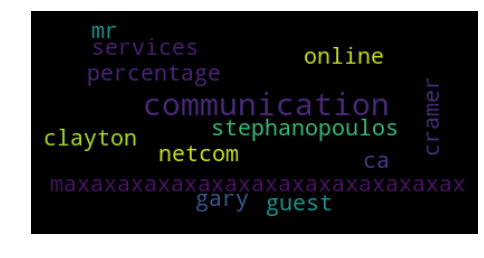

Topic 9 --------------------------------------



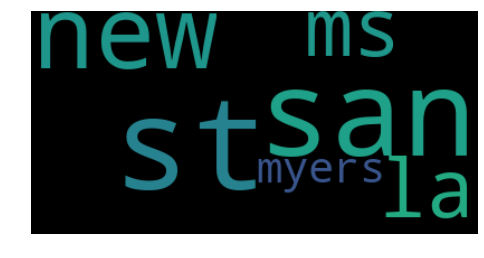

Topic 10 --------------------------------------



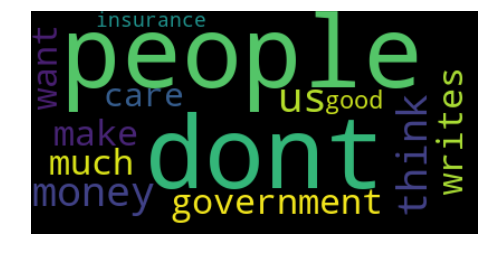

Topic 11 --------------------------------------



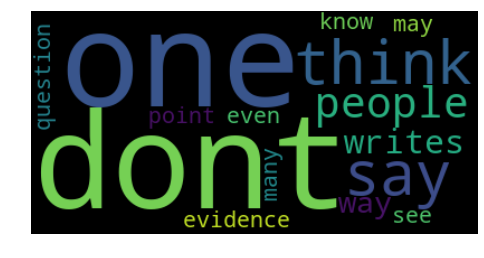

Topic 12 --------------------------------------



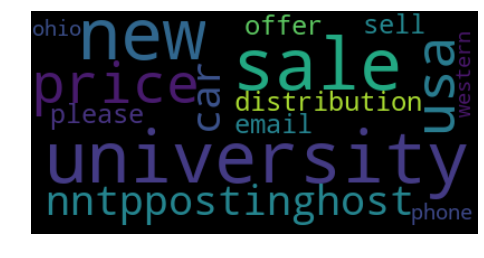

Topic 13 --------------------------------------



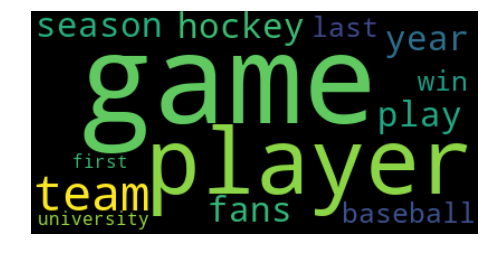

Topic 14 --------------------------------------



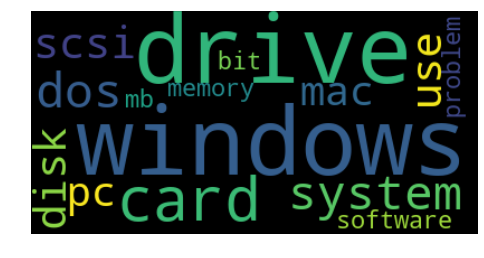

Topic 15 --------------------------------------



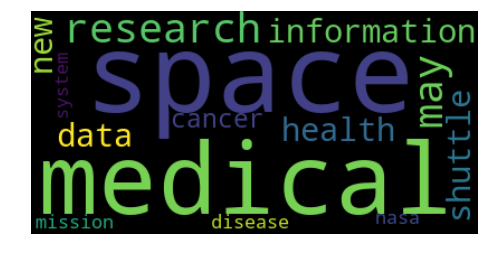

Topic 16 --------------------------------------



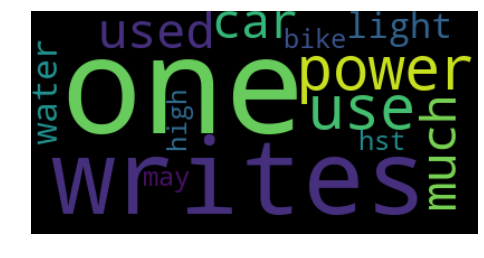

Topic 17 --------------------------------------



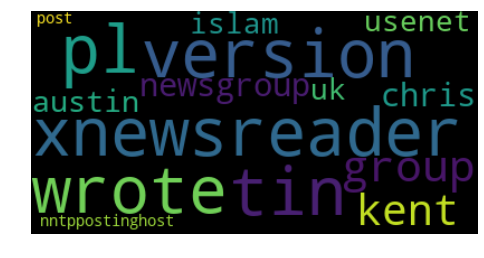

Topic 18 --------------------------------------



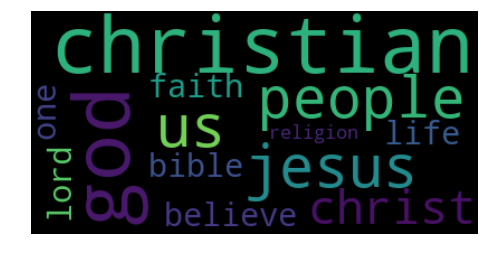

Topic 19 --------------------------------------



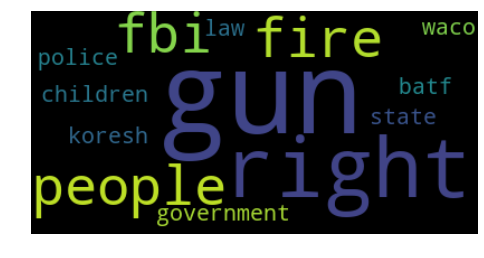

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def create_wordcloud(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = ""
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += (" " + term)
        
    wordcloud = WordCloud().generate(terms)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return plt

num_topics = 20
model = lda_model
topic_summaries = []

for i in range(num_topics):
    print('Topic '+str(i)+' --------------------------------------\n')
    tmp = create_wordcloud(model,topic_number=i, topn=15, output=True )
#     print tmp[:5]
    print
  


# Step 4 - 2 Doc2Vec Models

## Description

Train two Doc2Vec models upon the vocabularies in Step 2; Visualize your learned word and document embedding space; Collect Doc2Vec representation of each document. (20’)

In [0]:
# # Seperate each of the documents into arrays of words
# # then make a tags array [topic, id]

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
import csv


PATH = './'

def load_preprocessed_data():
  f = open(PATH + 'preprocessedData_2k.csv')
  preprocessed_data = list(rec for rec in csv.reader(f, delimiter=','))
  print(preprocessed_data[:1])
  return preprocessed_data

def create_tagged_document(list_of_list_of_words):
  print(list_of_list_of_words[:1])
  for i, list_of_words in enumerate(list_of_list_of_words):
    yield TaggedDocument(list_of_words, [i])

        
preprocessed_data = load_preprocessed_data()
        
train_data = list(create_tagged_document(preprocessed_data))
  
max_epochs = 14
vec_size = 100
alpha = 0.025

# This is only doing document based association. There 
model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=5,
                dm=1)

model.build_vocab(train_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(train_data,
                total_examples=model.corpus_count,
                epochs=model.epochs,
                total_words=total_count)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

# model.save("/root/Doc2Vec/d2v.model")
model.save("./d2v14Epochs_2kCorpus.model")
print("Model Saved")


[['andrew', 'genocide', 'work', 'god', 'civil', 'engineering', 'carnegie', 'mellon', 'pittsburgh', 'pa', 'writes', 'may', 'believe', 'correct', 'believe', 'believe', 'choose', 'whether', 'accept', 'gods', 'us', 'difference', 'cant', 'really', 'course', 'believe', 'biblical', 'doctrine', 'shows', 'among', 'church', 'always', 'beginning', 'say', 'believe', 'mean', 'believe', 'free', 'men', 'choose', 'course', 'life', 'also', 'god', 'however', 'hold', 'otherwise', 'end', 'god', 'god', 'must', 'give', 'enough', 'saved', 'receive', 'final', 'heaven', 'mean', 'without', 'cant', 'saved', 'means', 'god', 'give', 'knowing', 'need', 'hell', 'people', 'saved', 'saved', 'god', 'effort', 'god', 'become', 'fire', 'heart', 'thus', 'gods', 'punishment', 'working', 'holy', 'spirit', 'yes', 'god', 'judge', 'punishment', 'last', 'well', 'hold', 'god', 'certainly', 'gives', 'everybody', 'good', 'done', 'even', 'little', 'cant', 'next', 'life', 'one', 'next', 'life', 'one', 'every', 'sin', 'punishment', 't

# Step 5 - Clustering (BoW, TF-IDF, Topic Distribution, and Doc2Vec)

## Decsription

Conduct document clustering by K-means with four different doc. representations: 1) BoW; 2) TF-IDF; 3) Topics distribution; and 4) Doc2Vec. Compare different results by Normalized Mutual Information (NMI) and visualize the clustering results. (20’)

In [0]:
# Doc2Vec
from gensim.models.doc2vec import Doc2Vec
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

PATH = './'
def load_preprocessed_data():
  f = open(PATH + 'preprocessedData_2k.csv')
  preprocessed_data = list(rec for rec in csv.reader(f, delimiter=','))
  print(preprocessed_data[:1])
  return preprocessed_data

model = Doc2Vec.load("./d2v14Epochs_2kCorpus.model")

doc_vecs = []

for row in load_preprocessed_data():
    vector = model.infer_vector(row)
    doc_vecs.append(vector)
# creating a matrix from list of vectors
mat = np.stack(doc_vecs)

# Clustering Kmeans
km_model = KMeans(n_clusters=200)
km_model.fit(mat)
# Get cluster assignment labels
y_kmeans = km_model.predict(mat)

print('calculating nmi')
print(nmi(topics, km_model.labels_))

print('In pca')
pca = PCA(n_components=2).fit(mat)
data2D = pca.transform(mat)

print('plotting')
plt.scatter(data2D[:, 0], data2D[:, 1], c=y_kmeans, s=5, cmap='viridis')

[['andrew', 'genocide', 'work', 'god', 'civil', 'engineering', 'carnegie', 'mellon', 'pittsburgh', 'pa', 'writes', 'may', 'believe', 'correct', 'believe', 'believe', 'choose', 'whether', 'accept', 'gods', 'us', 'difference', 'cant', 'really', 'course', 'believe', 'biblical', 'doctrine', 'shows', 'among', 'church', 'always', 'beginning', 'say', 'believe', 'mean', 'believe', 'free', 'men', 'choose', 'course', 'life', 'also', 'god', 'however', 'hold', 'otherwise', 'end', 'god', 'god', 'must', 'give', 'enough', 'saved', 'receive', 'final', 'heaven', 'mean', 'without', 'cant', 'saved', 'means', 'god', 'give', 'knowing', 'need', 'hell', 'people', 'saved', 'saved', 'god', 'effort', 'god', 'become', 'fire', 'heart', 'thus', 'gods', 'punishment', 'working', 'holy', 'spirit', 'yes', 'god', 'judge', 'punishment', 'last', 'well', 'hold', 'god', 'certainly', 'gives', 'everybody', 'good', 'done', 'even', 'little', 'cant', 'next', 'life', 'one', 'next', 'life', 'one', 'every', 'sin', 'punishment', 't

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


ValueError: ignored

In [0]:
# plot with actual values
print(nmi(topics, int_topics))
plt.scatter(data2D[:, 0], data2D[:, 1], c=int_topics, s=5, cmap='viridis')

In [0]:
# clustering for topics distribution
from sklearn.datasets import fetch_20newsgroups
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
# LDA
from gensim.models.ldamulticore import LdaMulticore
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as nmi

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

model = LdaMulticore.load('lda_model.model')

all_topics = []

for c in model[corpus]:
    topics = [0] * 20
    for topic in c[0]:
        topics[topic[0]] = topic[1]
    all_topics.append(topics)

mat = np.stack(all_topics)

print('starting kmeans')
# Clustering Kmeans
km_model = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
km_model.fit(mat)
# Get cluster assignment labels
labels = km_model.labels_
y_kmeans = km_model.predict(mat)

plt.scatter(mat[:, 0], mat[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.3)

IndexError: ignored

In [0]:
print(nmi(topics, int_topics))

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
# LDA visualizations
from sklearn.manifold import TSNE
from gensim.models.ldamulticore import LdaMulticore

model = LdaMulticore.load('./lda_model.model')
tsne_model = TSNE(n_components=2, random_state=0, verbose = 1, init= "pca", n_iter=500, n_iter_without_progress=100)
print('About to calculate tsne')
print('about to fit transform')
tsne_lda = tsne_model.fit_transform(mat)

About to calculate tsne
about to fit transform
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18846 samples in 0.578s...
[t-SNE] Computed neighbors for 18846 samples in 9.878s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18846
[t-SNE] Computed conditional probabilities for sample 2000 / 18846
[t-SNE] Computed conditional probabilities for sample 3000 / 18846
[t-SNE] Computed conditional probabilities for sample 4000 / 18846
[t-SNE] Computed conditional probabilities for sample 5000 / 18846
[t-SNE] Computed conditional probabilities for sample 6000 / 18846
[t-SNE] Computed conditional probabilities for sample 7000 / 18846
[t-SNE] Computed conditional probabilities for sample 8000 / 18846
[t-SNE] Computed conditional probabilities for sample 9000 / 18846
[t-SNE] Computed conditional probabilities for sample 10000 / 18846
[t-SNE] Computed conditional probabilities for sample 11000 / 18846
[t-SNE] Computed conditional probabilities for sample 12000 / 18846
[t-

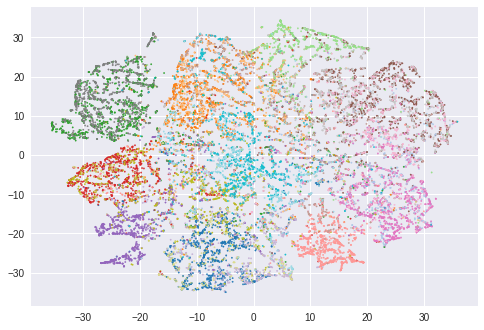

In [0]:
# plot tsne
import matplotlib.pyplot as plt
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], s=2, c=int_topics, cmap='tab20')

Clustering for BoW and TF-IDF in Step 2 Header

In [0]:
# Doc2vec visualizations
from sklearn.manifold import TSNE
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

model = Doc2Vec.load('./d2v15Epochs100VecSize.model')
tsne_model = TSNE(n_components=2, random_state=0, verbose = 1, init= "pca", n_iter=500, n_iter_without_progress=100)
print('About to calculate tsne')
# X = model[model.wv.vocab]
print('about to fit transform')
tsne_articles_2D = tsne_model.fit_transform(model.docvecs.vectors_docs)

In [0]:
# plot tsne
import matplotlib.pyplot as plt
plt.scatter(tsne_articles_2D[:, 0], tsne_articles_2D[:, 1], s=2, c=int_topics, cmap='tab20')

# Step 6 - Analysis

## Description

Do experiment analysis from the following aspects: 1) Impact of different preprocessing ways (e.g., how to filter vocabulary; using n-gram model); 2) Impact of different topic numbers; and 3) Different training methods for Doc2Vec; 4) What’s the key factor for doc. visualization? (20’)

# Step 7 - Presentation

## Description

Every group is required to give a presentation with slides in our class. The presentation time is about 5-10 minutes. Each talk should include the following contents.
1) Introduction to your group members and team assignments.
2) A clear illustration for your project workflow.
3) All the experimental results you have obtained with some necessary experimental analyses.
4) A live demo for your visualization result. For example, a demo for visualizing different topics, or
displaying your word/doc embedding space. (Jupyter Notebook is recommended.)

# Step 8 - Report

## Description

The final submission is required as follows.
1) A two-page pdf report including 1) a brief introduction to the project and your method; 2) all the
necessary results and analyses; 3) references for the tools and papers you used in this work.
2) A package file including all your source codes and visualization results.